# Predicting Coupon Acceptance on E-commerce Platforms


**Problem Statement:**

The goal of this project is to leverage machine learning techniques to analyze driving scenarios and user attributes collected from an e-commerrce website.
The survey describes different driving scenarios including the user's destination, current time, weather, passenger, coupon attributes, user attributes and contextual attributes, and then asks the user whether he/she will accept the coupon or not.


**Objective:**

The aim is to optimize coupon distribution strategies and enhance user engagement with the platform's offerings by accurately predicting whether users will accept coupons during their journeys

## Importing Basic Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Data/Ds_Data.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# The Data

In [8]:
df.shape

(12684, 25)

In [9]:
df.size

317100

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [11]:
df.describe(include='all')

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684.000000,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,2,2,8,5,NaN,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,Coffee House,1d,Female,21,Married partner,NaN,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3996,7091,6511,2653,5100,NaN,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,0.414144,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,0.492593,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [12]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

## Handling Missing Data

In [13]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [14]:
missing_percent = (df.isnull().sum()/len(df))*100
missing_percent

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000
has_children,0.000000


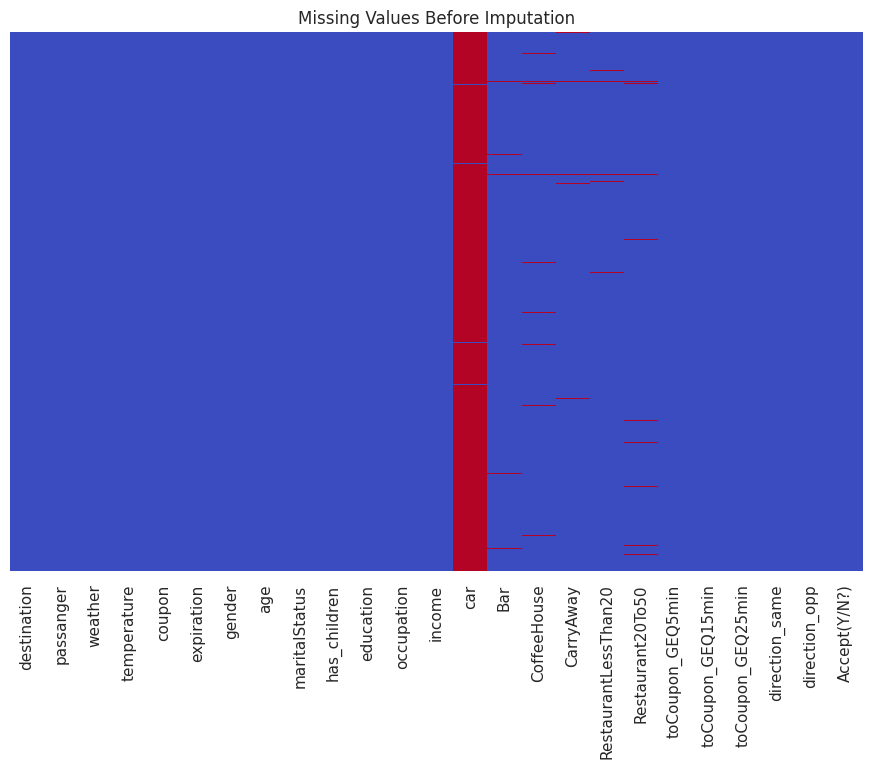

In [15]:
plt.figure(figsize=(11,7))
sns.heatmap(df.isnull(), cmap = 'coolwarm', cbar = False, yticklabels=False)
plt.title('Missing Values Before Imputation')
plt.show()

In [17]:
for i in df.columns:
    print('**************************************************', i, '************************************************')
    print()
    print(set(df[i].tolist()))
    print()

************************************************** destination ************************************************

{'No Urgent Place', 'Home', 'Work'}

************************************************** passanger ************************************************

{'Kid(s)', 'Friend(s)', 'Alone', 'Partner'}

************************************************** weather ************************************************

{'Snowy', 'Sunny', 'Rainy'}

************************************************** temperature ************************************************

{80, 30, 55}

************************************************** coupon ************************************************

{'Restaurant(20-50)', 'Carry out & Take away', 'Bar', 'Restaurant(<20)', 'Coffee House'}

************************************************** expiration ************************************************

{'1d', '2h'}

************************************************** gender ***********************************************

Since the percentage of missing data in the feature 'car' is very high about 99.15%, we can drop the feature.

In [18]:
df = df.drop(columns=['car'])
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Since the missing data in features 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50' are very small about 0.84 % , 1.71 % , 1.19 % , 1.02 % and 1.49 % respectively we can impute the missing data. Since the dtypes of the features are object, we can go with 'most frequent' strategy to impute the missing values

## Imputing Missing Data

In [19]:
from sklearn.impute import SimpleImputer
sm = SimpleImputer(strategy = 'most_frequent')

In [20]:
imputed_df = pd.DataFrame(sm.fit_transform(df), columns = df.columns)

In [21]:
imputed_df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [22]:
imputed_df.isnull().sum()/len(df)*100

,0
destination,0.0
passanger,0.0
weather,0.0
temperature,0.0
coupon,0.0
expiration,0.0
gender,0.0
age,0.0
maritalStatus,0.0
has_children,0.0


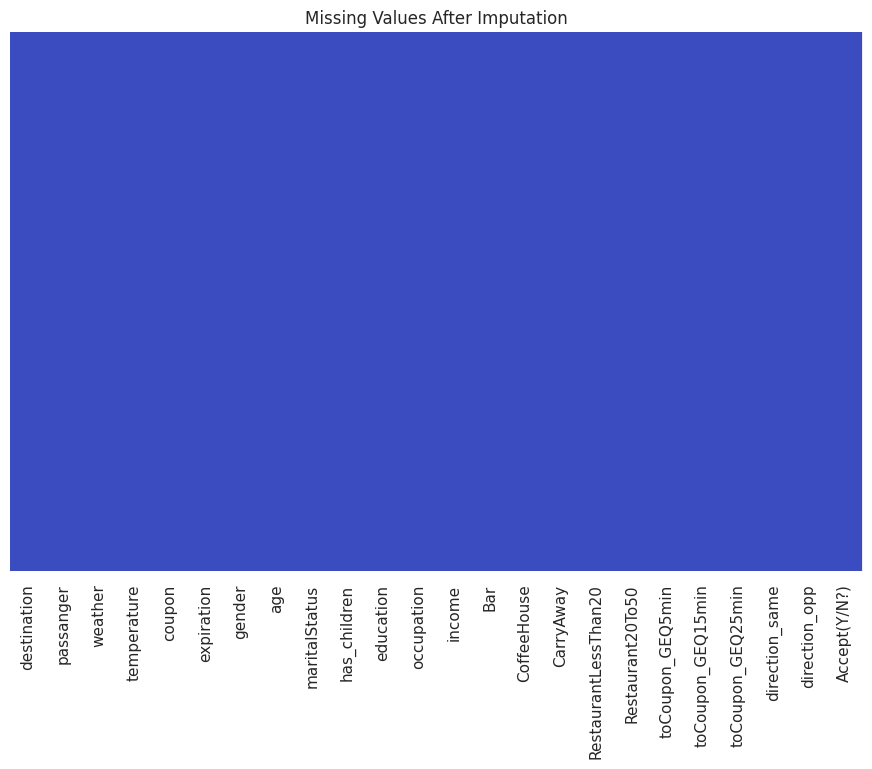

In [23]:
plt.figure(figsize=(11,7))
sns.heatmap(imputed_df.isnull(), cmap = 'coolwarm', cbar = False, yticklabels=False)
plt.title('Missing Values After Imputation')
plt.show()

# Data Visualization

In [24]:
x = imputed_df.drop(columns=['Accept(Y/N?)'])
y = imputed_df['Accept(Y/N?)']

In [25]:
a = x.drop(columns=['income','occupation','education'])
a.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp'],
      dtype='object')

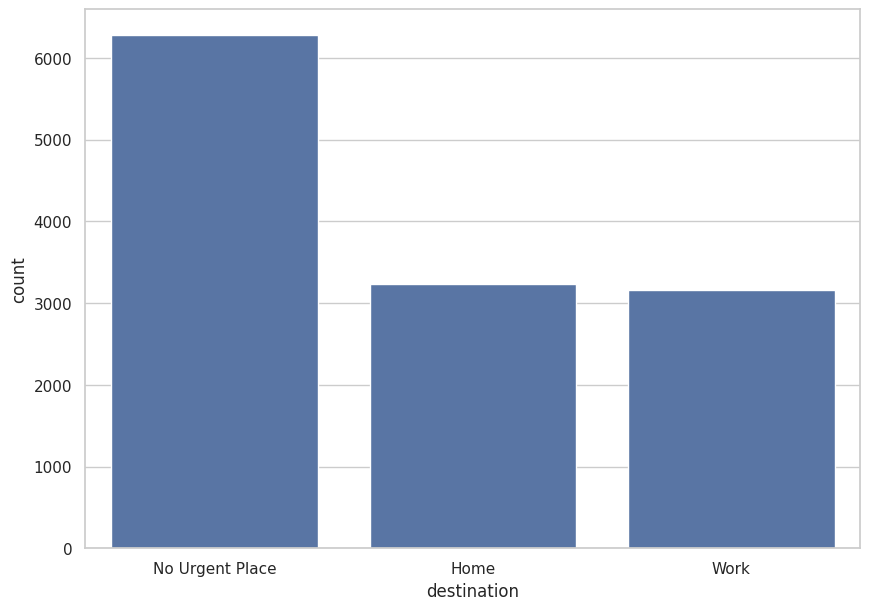

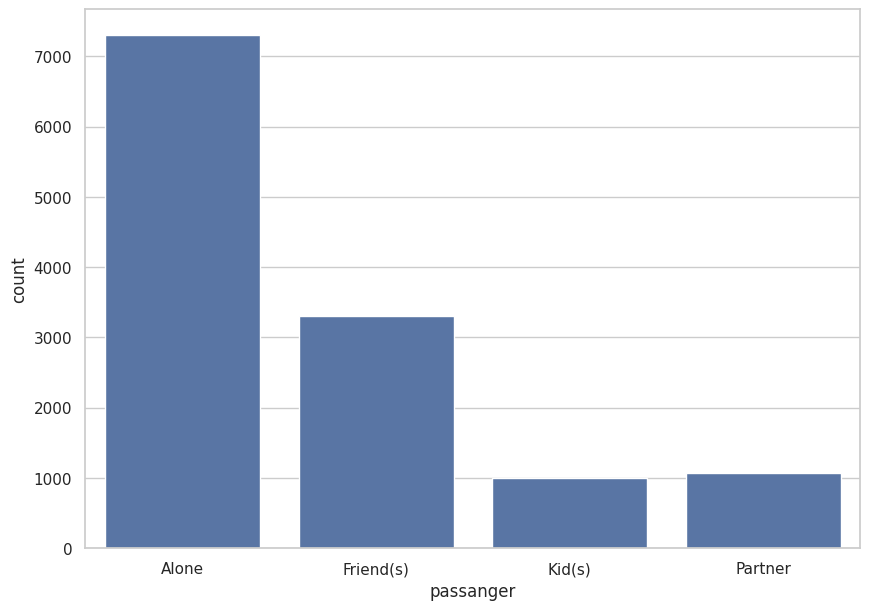

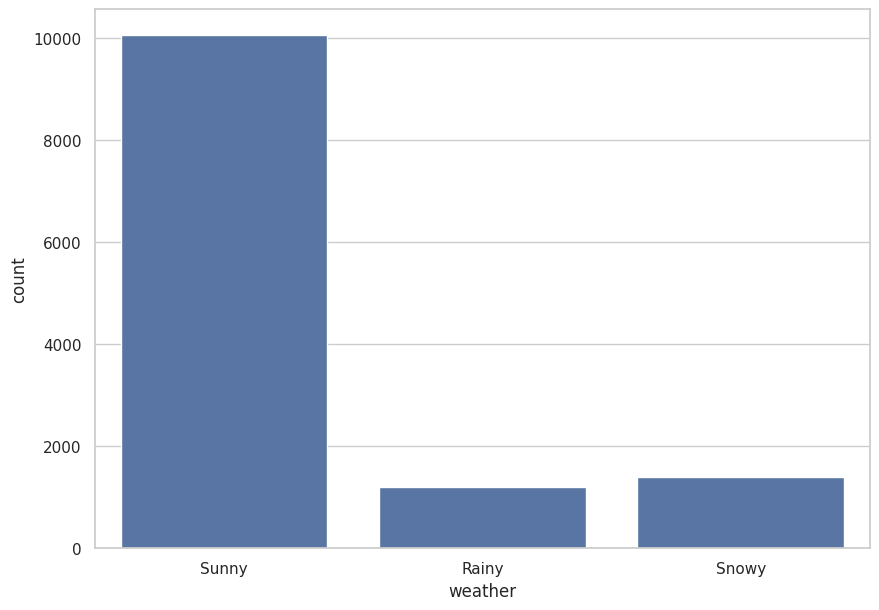

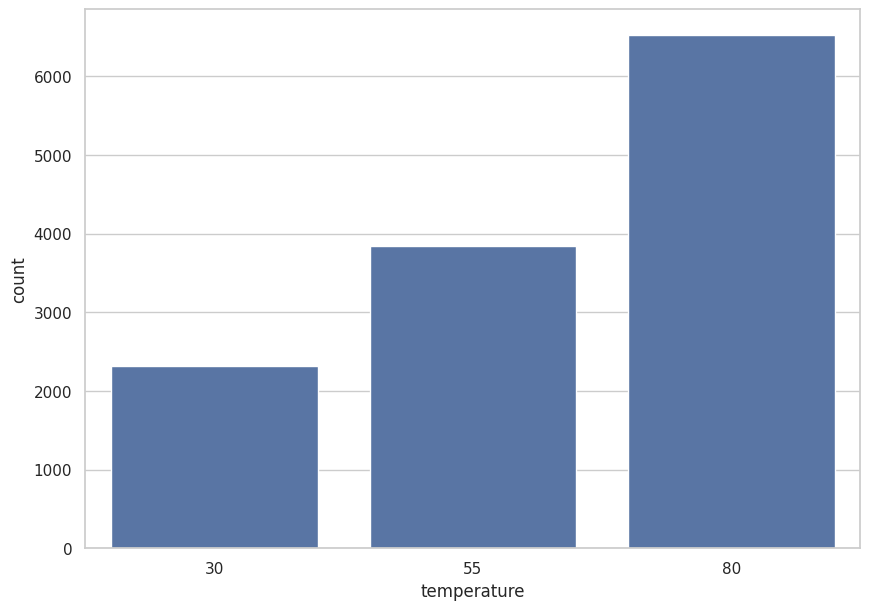

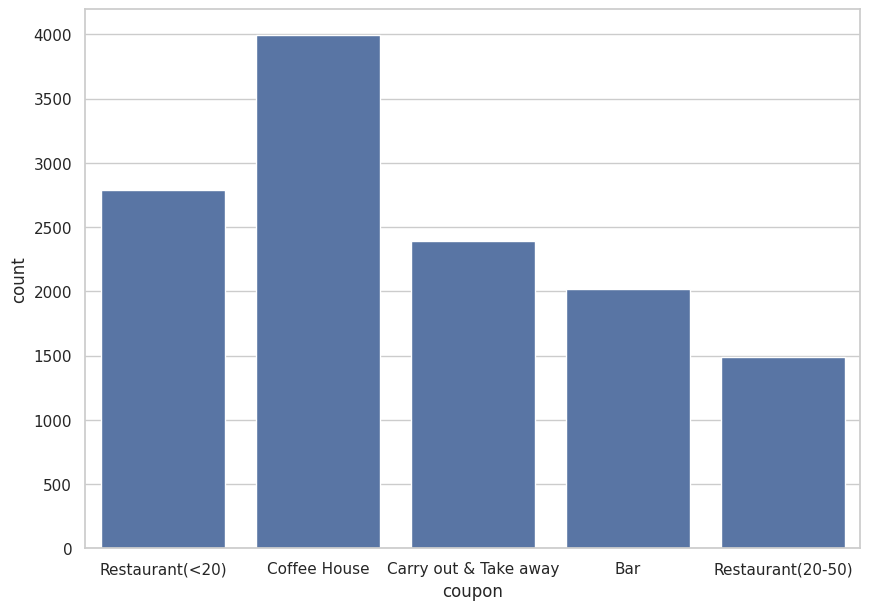

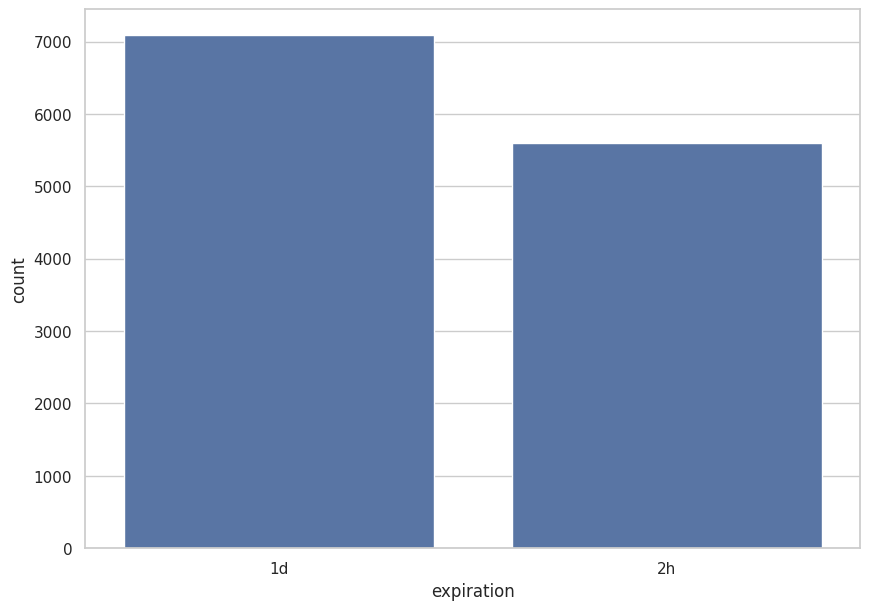

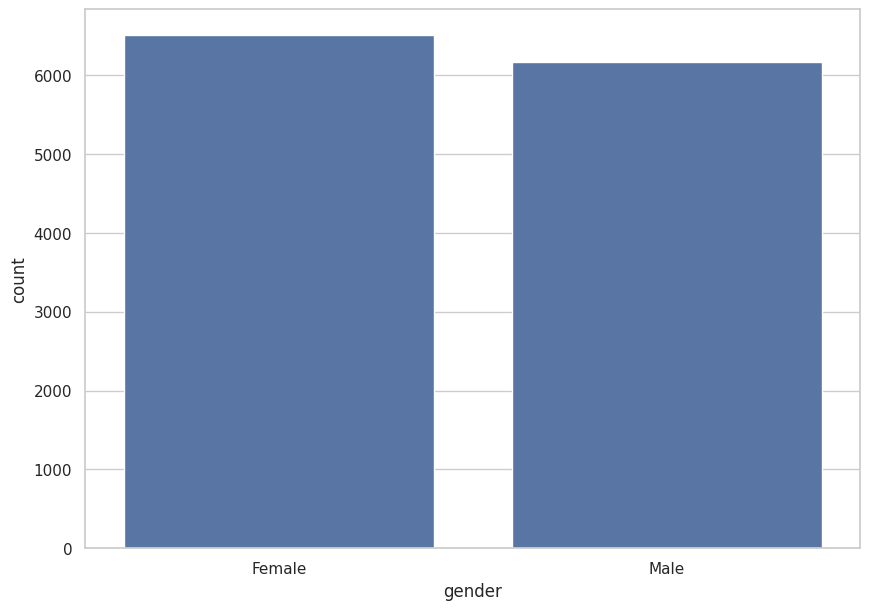

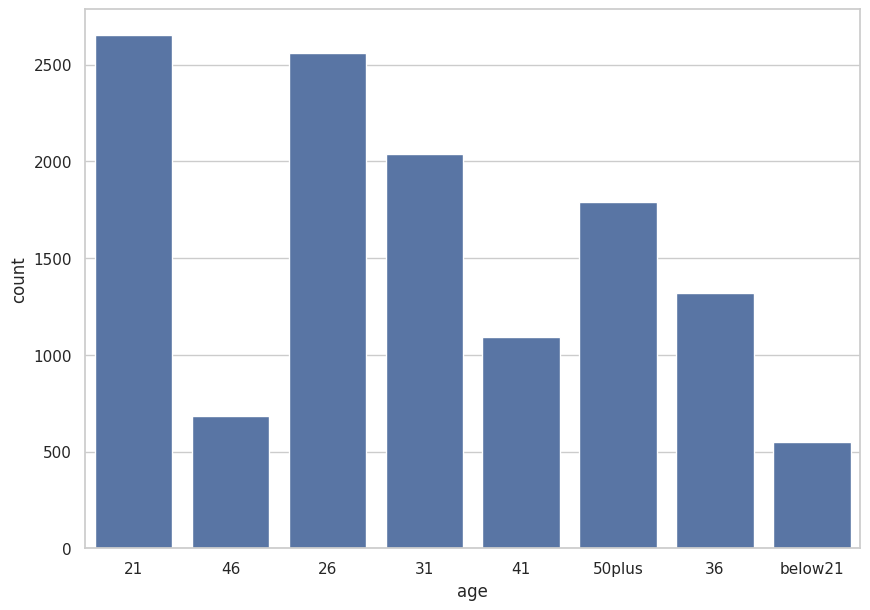

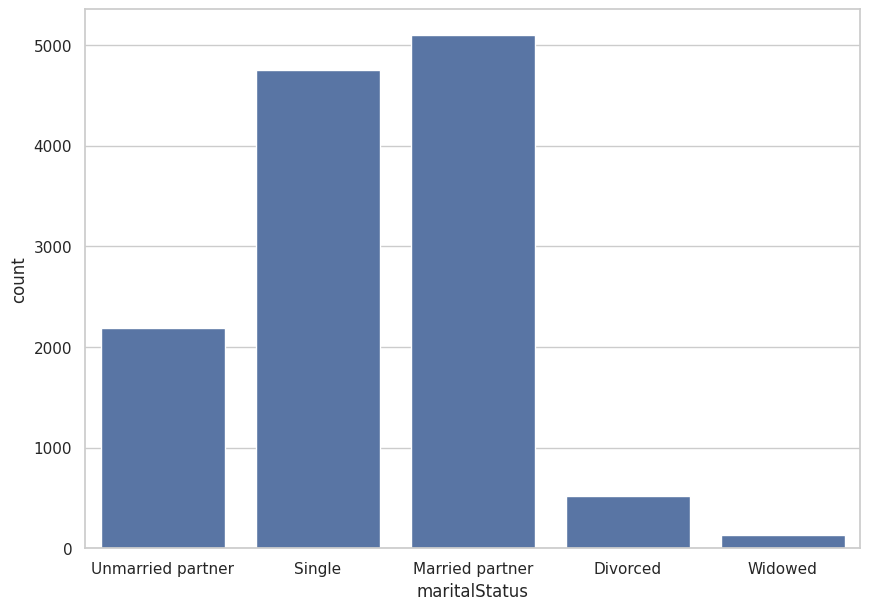

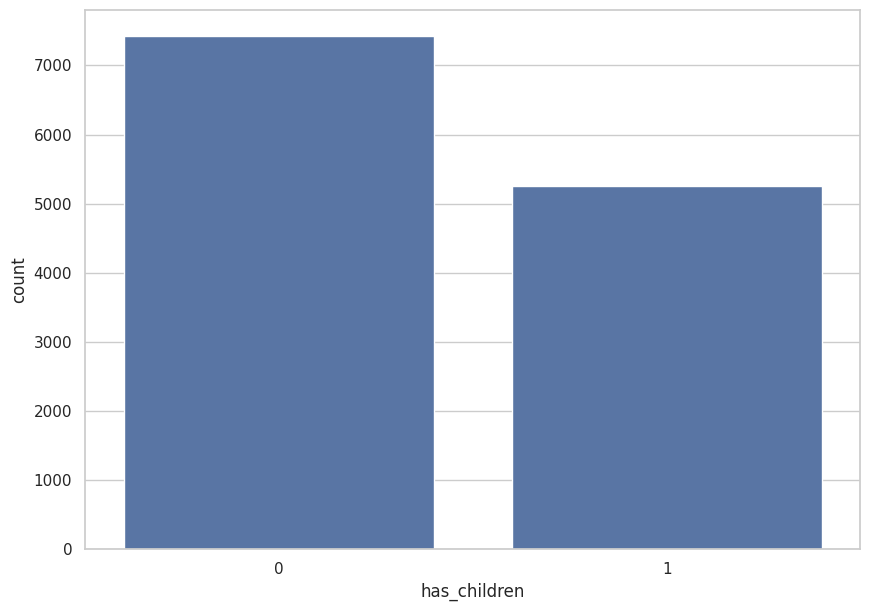

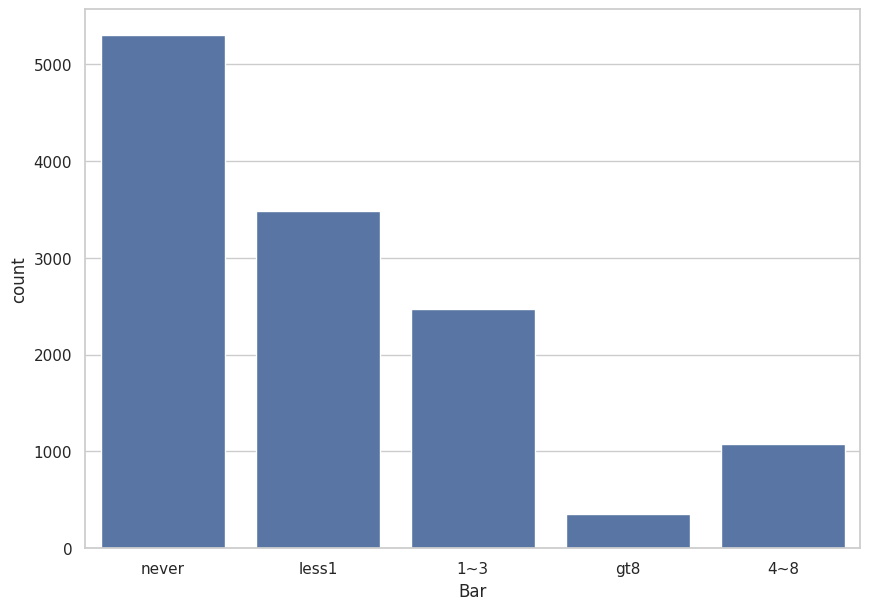

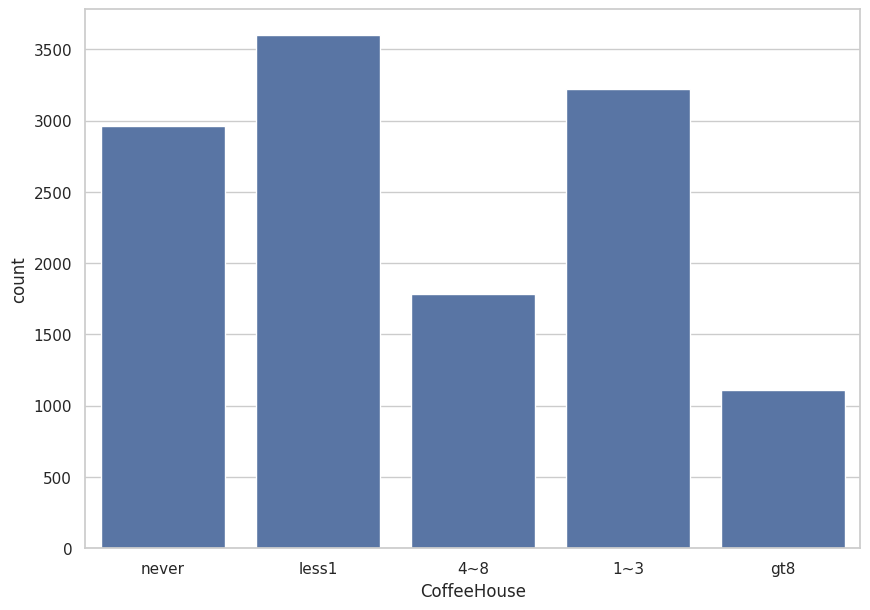

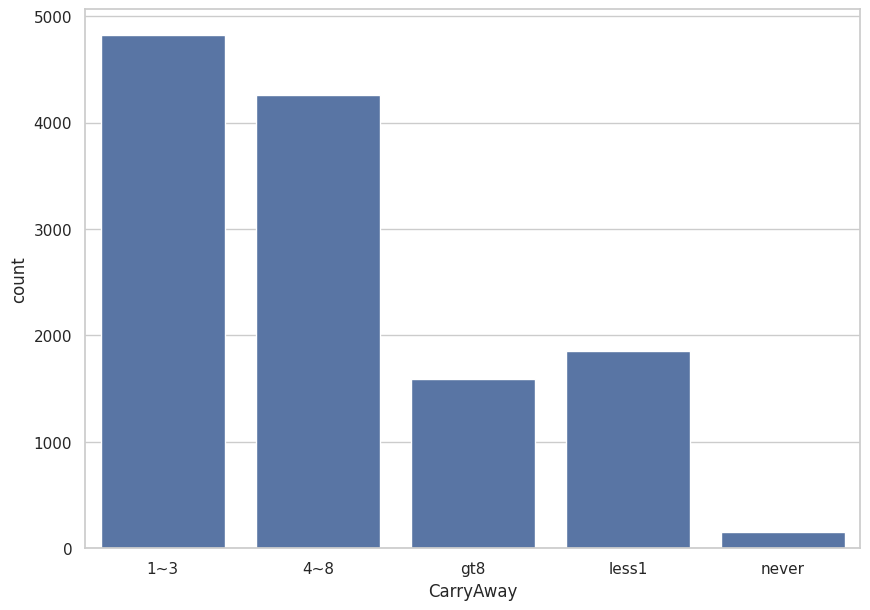

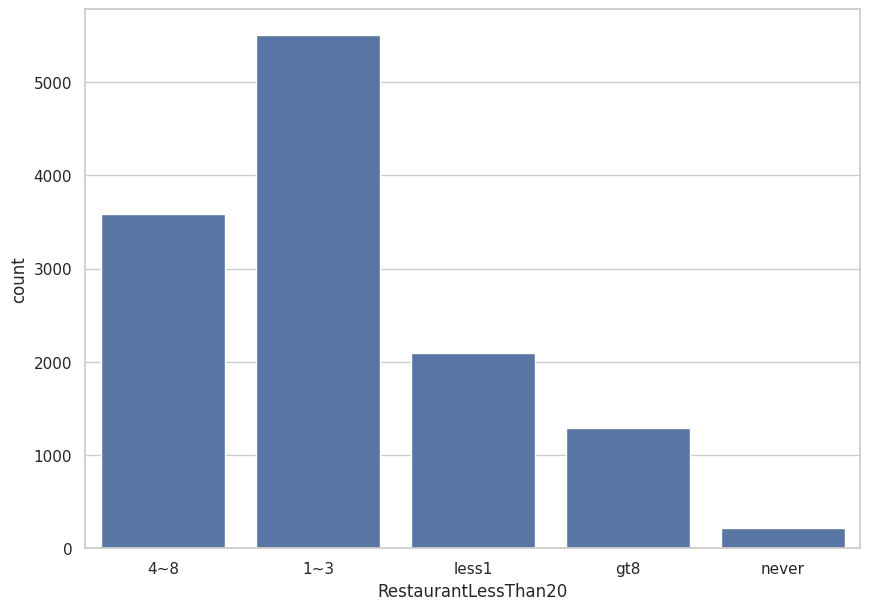

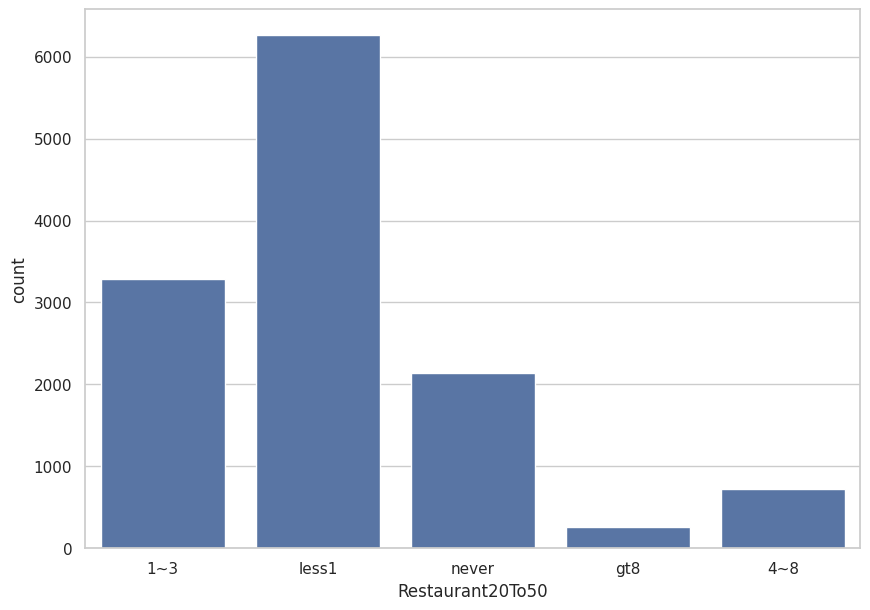

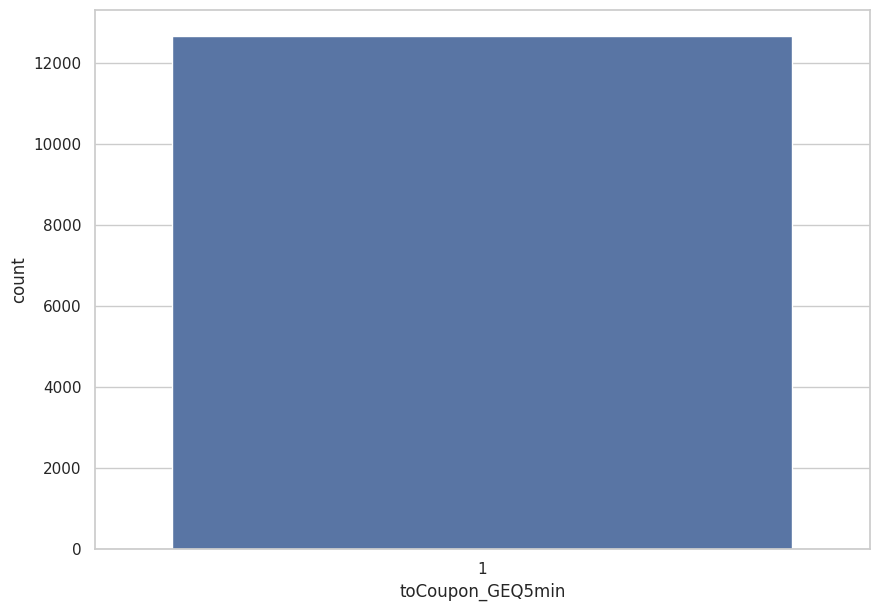

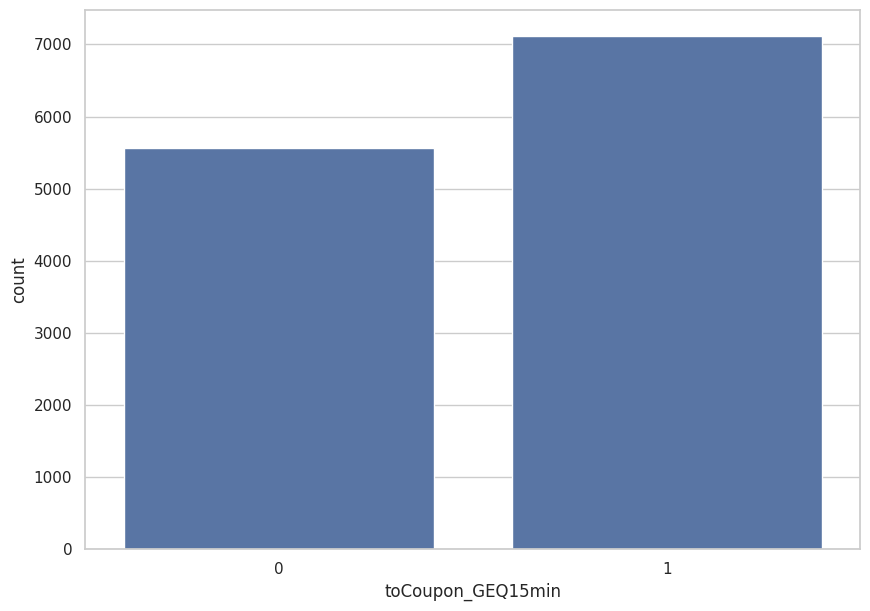

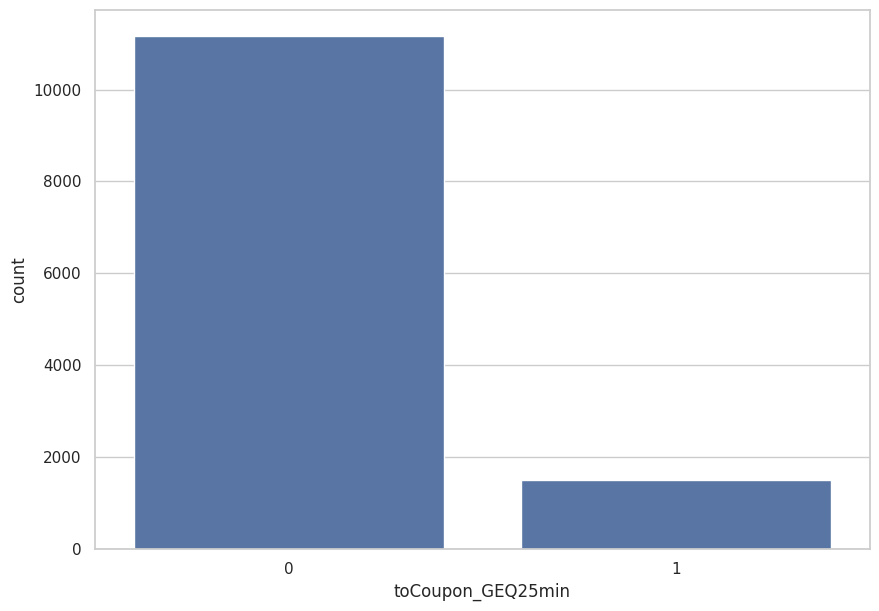

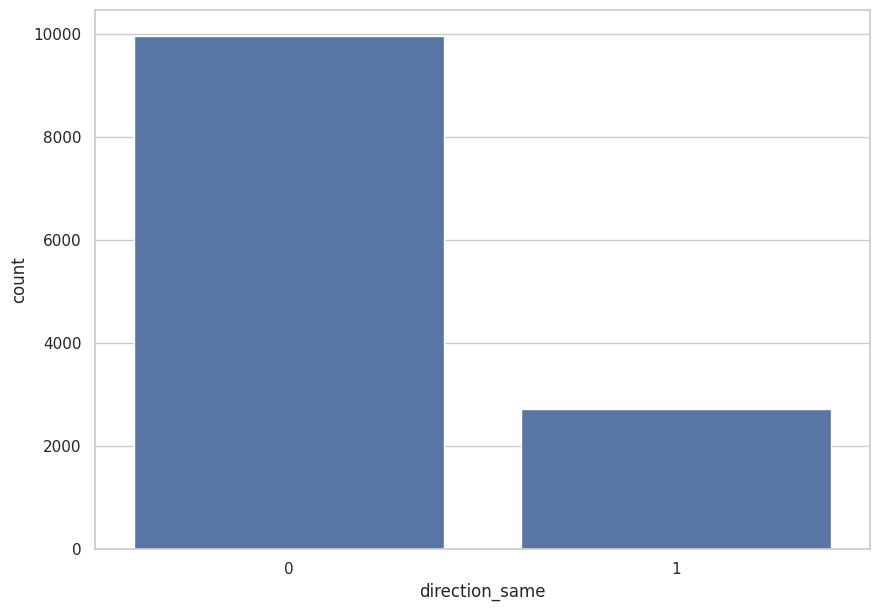

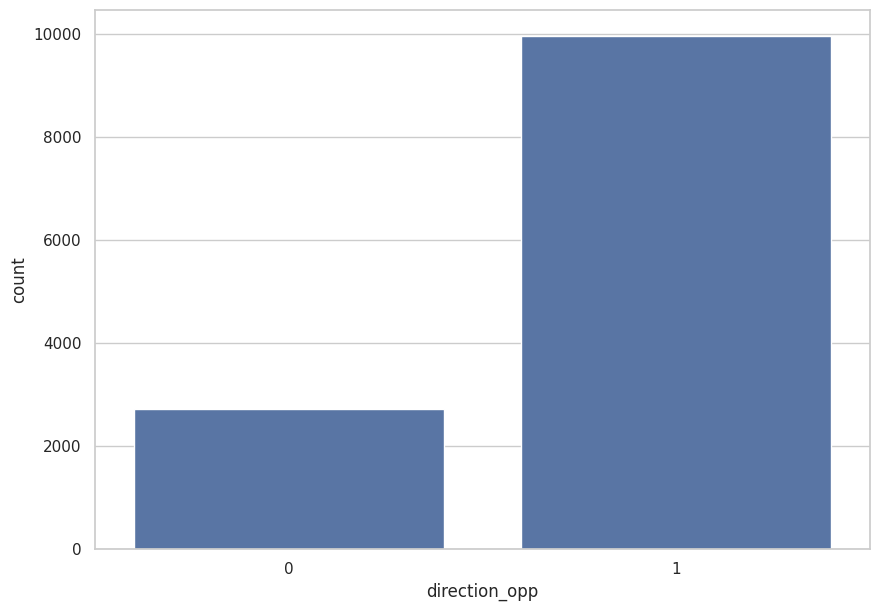

In [26]:
def countplots(col):
    plt.figure(figsize=(10,7))
    sns.set_style('whitegrid')
    sns.countplot(x = a[col])
    plt.show()

for i in list(a.columns):
    countplots(i)

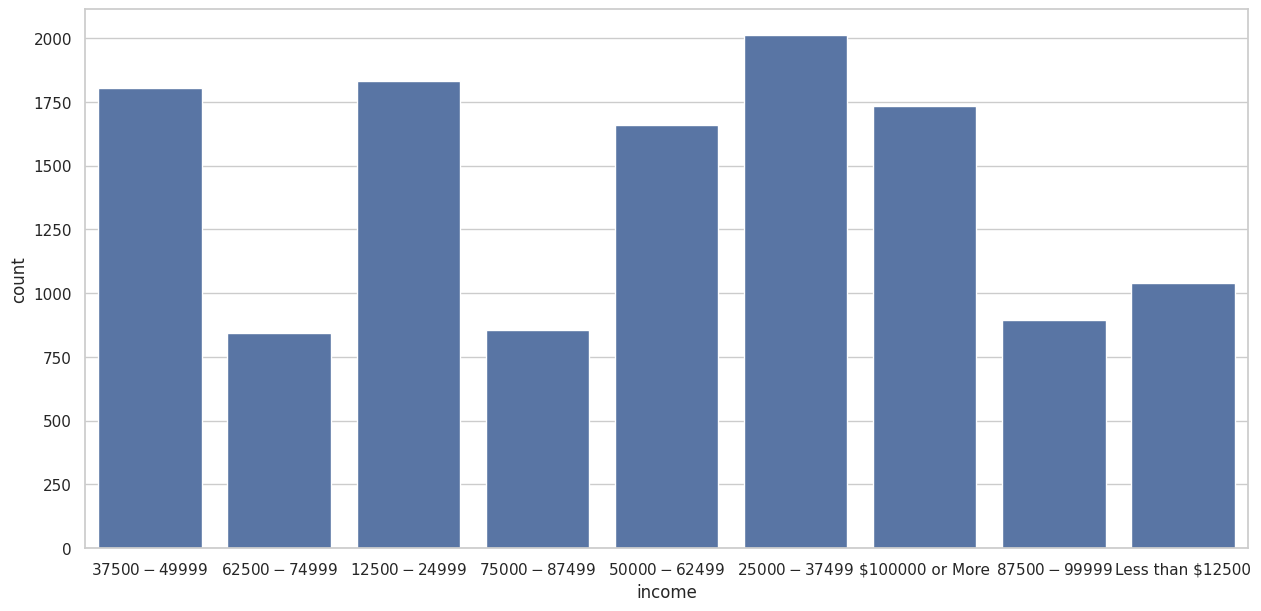

In [27]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(x = 'income', data = x)
plt.show()

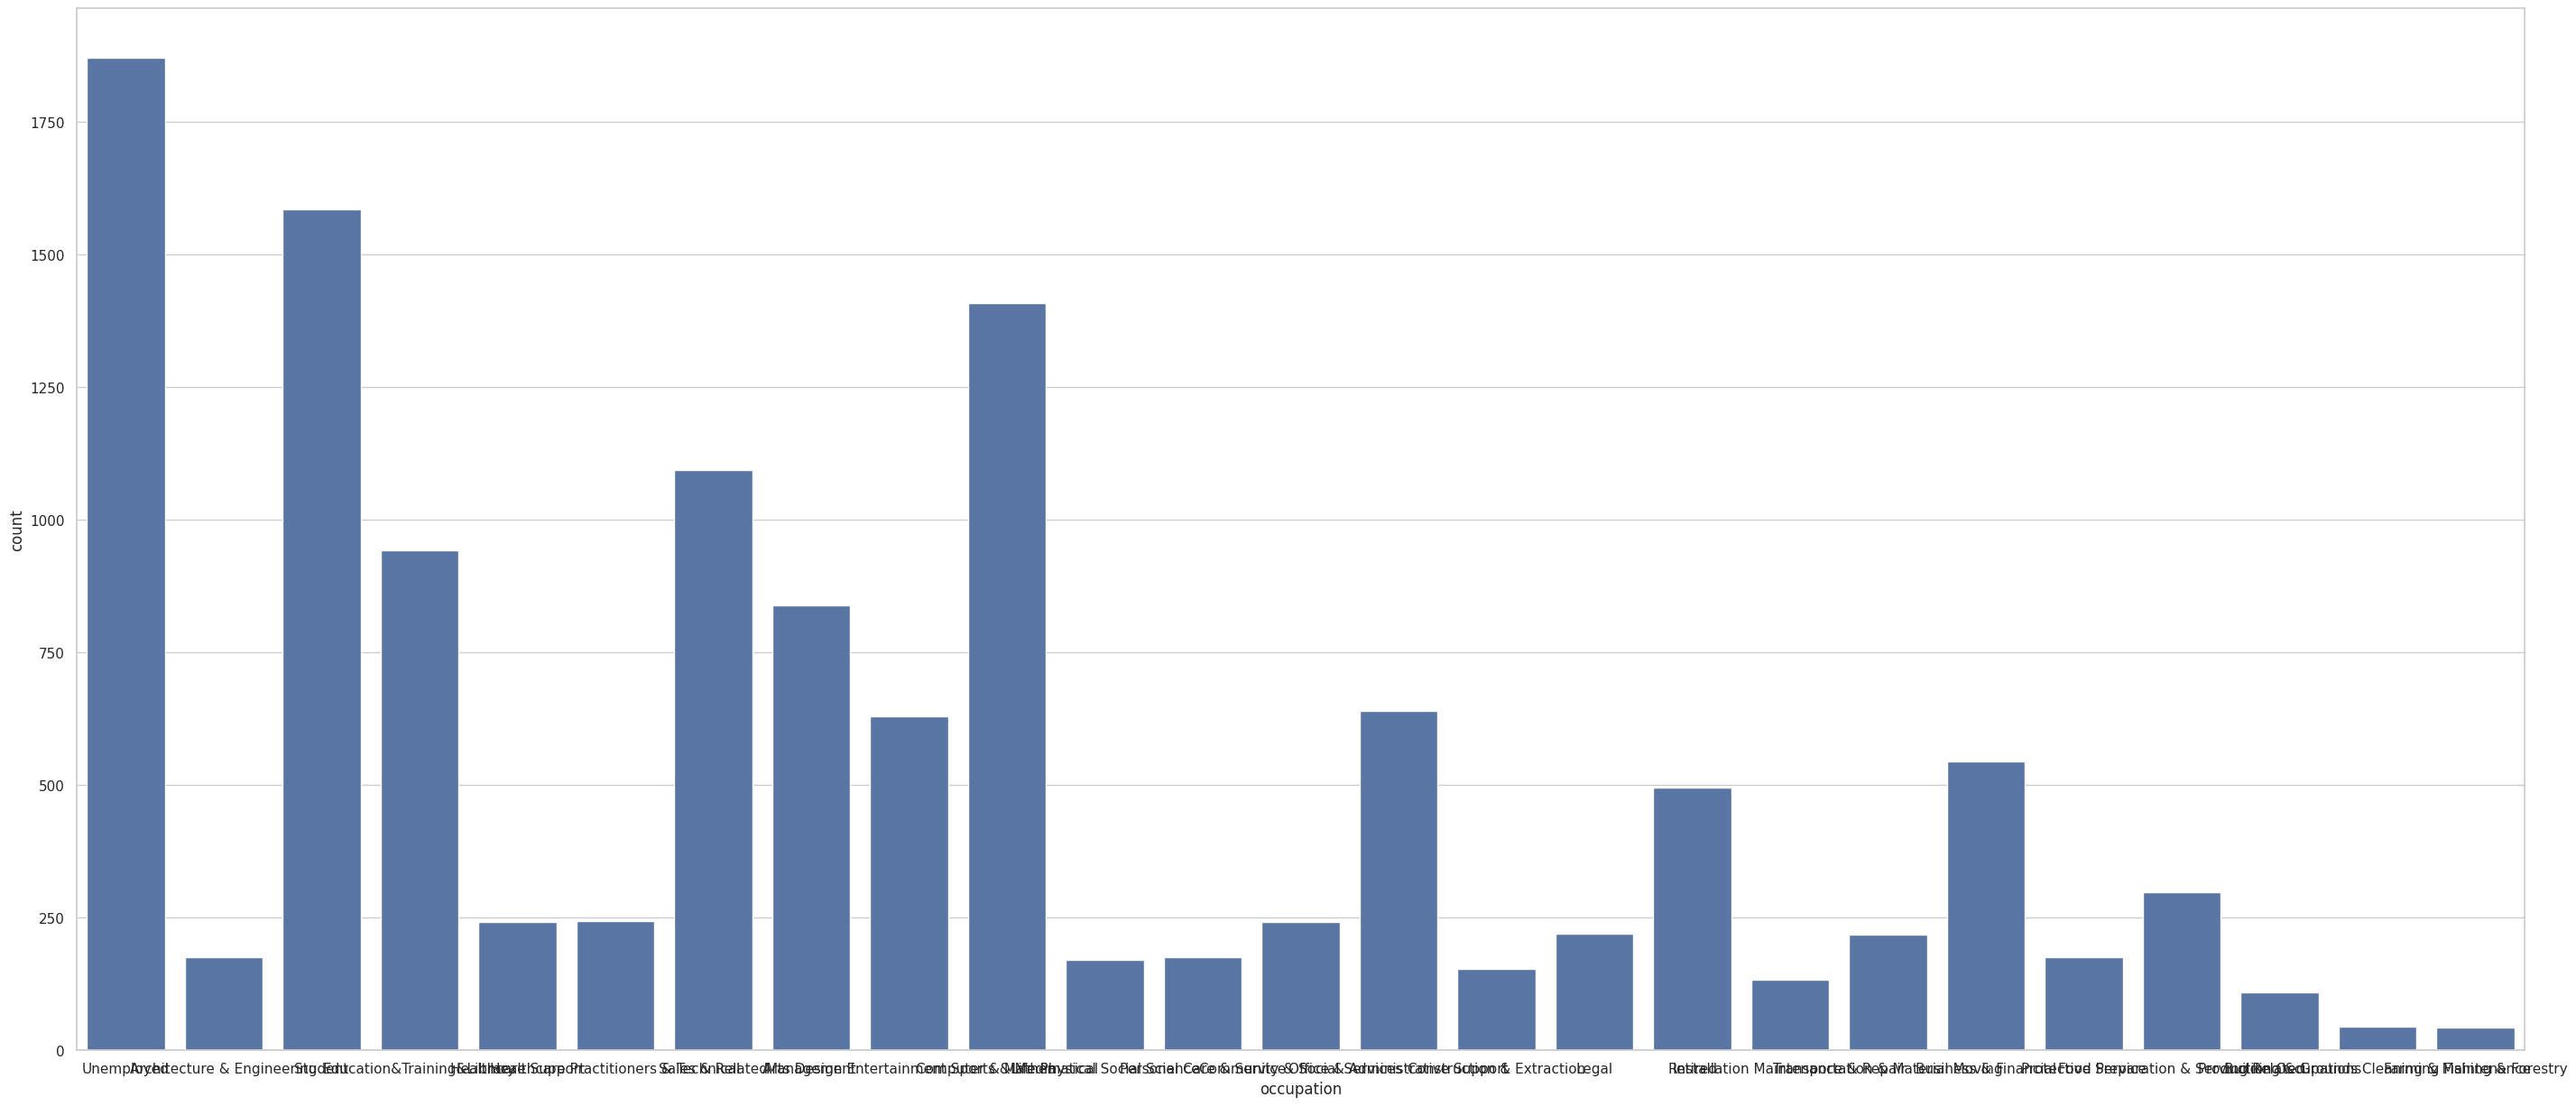

['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [28]:
plt.figure(figsize=(35,15))
sns.set_style('whitegrid')
sns.countplot(x = 'occupation', data = x)
plt.show()
print(x['occupation'].unique())

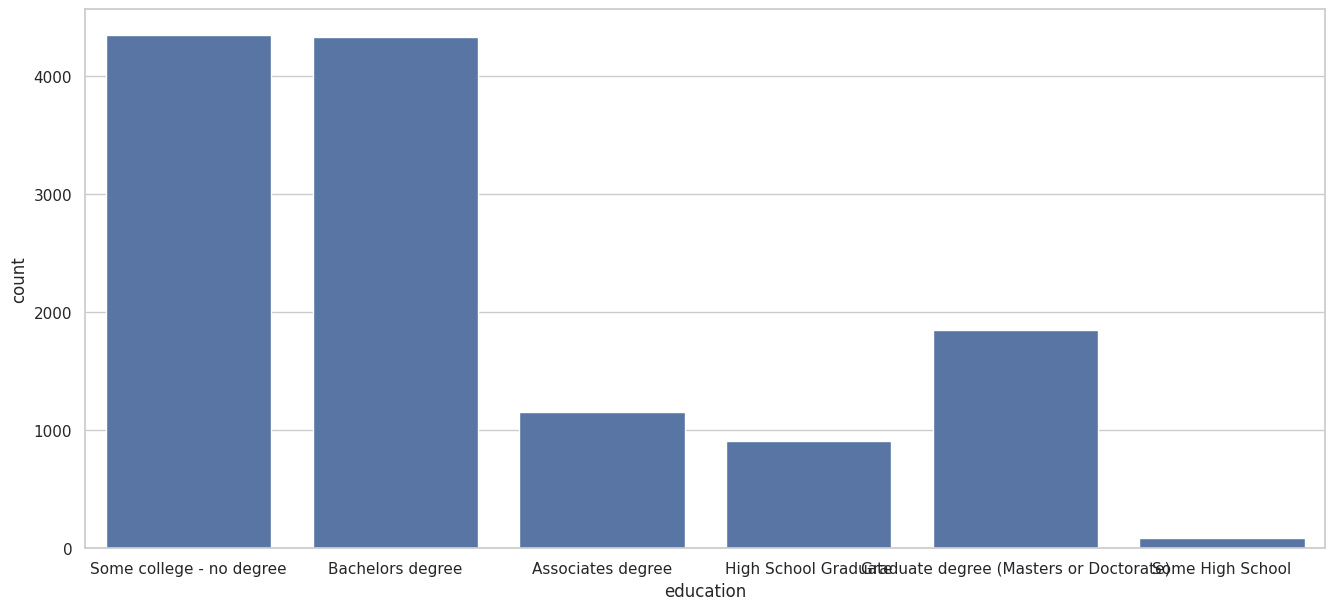

In [29]:
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
sns.countplot(x = 'education', data = x)
plt.show()

In [30]:
df1 = imputed_df

In [31]:
df1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


## Converting dtypes of the features

In [32]:
df1['has_children'] = df1['has_children'].astype('int64')
df1['income'] = df1['income'].astype('category')
df1['toCoupon_GEQ5min'] = df1['toCoupon_GEQ5min'].astype('int64')
df1['toCoupon_GEQ15min'] = df1['toCoupon_GEQ15min'].astype('int64')
df1['toCoupon_GEQ25min'] = df1['toCoupon_GEQ25min'].astype('int64')
df1['direction_same'] = df1['direction_same'].astype('int64')
df1['direction_opp'] = df1['direction_opp'].astype('int64')
df1['Accept(Y/N?)'] = df1['Accept(Y/N?)'].astype('int64')

In [33]:
df1['temperature'] = df1['temperature'].astype('int64')

### Checking dtype

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  int64   
 4   coupon                12684 non-null  object  
 5   expiration            12684 non-null  object  
 6   gender                12684 non-null  object  
 7   age                   12684 non-null  object  
 8   maritalStatus         12684 non-null  object  
 9   has_children          12684 non-null  int64   
 10  education             12684 non-null  object  
 11  occupation            12684 non-null  object  
 12  income                12684 non-null  category
 13  Bar                   12684 non-null  object  
 14  CoffeeHouse           12684 non-null  object  
 15  Ca

# Label Encoding

In [36]:
df2 = df1.copy()

In [37]:
df2.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [38]:
df2['gender_m'] = pd.get_dummies(df2['gender'],dtype=int,drop_first=True)

In [39]:
df2['expiration_2h'] = pd.get_dummies(df2['expiration'],dtype=int,drop_first=True)

In [40]:
df2 = df2.drop(columns=['gender','expiration'])

In [41]:
destination_labelled = pd.get_dummies(df2['destination'],dtype=int,drop_first=True)

In [42]:
destination_labelled.tail()

,No Urgent Place,Work
12679,0,0
12680,0,1
12681,0,1
12682,0,1
12683,0,1


In [43]:
df2 = df2.drop(columns=['destination'])

In [45]:
passanger_labelled = pd.get_dummies(df2['passanger'],dtype=int,drop_first=True)
weather_labelled = pd.get_dummies(df2['weather'],dtype=int,drop_first=True)
coupon_labelled = pd.get_dummies(df2['coupon'],dtype=int,drop_first=True)
maritalStatus_labelled = pd.get_dummies(df2['maritalStatus'],dtype=int,drop_first=True)
education_labelled = pd.get_dummies(df2['education'],dtype=int,drop_first=True)
occupation_labelled = pd.get_dummies(df2['occupation'],dtype=int,drop_first=True)
Bar_labelled = pd.get_dummies(df2['Bar'],dtype=int,drop_first=True)
CoffeeHouse_labelled = pd.get_dummies(df2['CoffeeHouse'],dtype=int,drop_first=True)
CarryAway_labelled = pd.get_dummies(df2['CarryAway'],dtype=int,drop_first=True)
RestaurantLessThan20_labelled = pd.get_dummies(df2['RestaurantLessThan20'],dtype=int,drop_first=True)
Restaurant20To50_labelled = pd.get_dummies(df2['Restaurant20To50'],dtype=int,drop_first=True)

In [46]:
income_labelled = pd.get_dummies(df2['income'],dtype=int,drop_first=True)

In [47]:
age_labelled = pd.get_dummies(df2['age'],dtype=int,drop_first=True)

In [48]:
df2 = df2.drop(columns=['age'])

In [49]:
df2 = df2.drop(columns=['income'])

In [50]:
df2 = df2.drop(columns=['passanger','weather','coupon','maritalStatus','education','occupation','Bar','CoffeeHouse',
                        'CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [51]:
weather_labelled.head()

,Snowy,Sunny
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [52]:
df2.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),gender_m,expiration_2h
0,55,1,1,0,0,0,1,1,0,0
1,80,1,1,0,0,0,1,0,0,1
2,80,1,1,1,0,0,1,1,0,1
3,80,1,1,1,0,0,1,0,0,1
4,80,1,1,1,0,0,1,0,0,0


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   temperature        12684 non-null  int64
 1   has_children       12684 non-null  int64
 2   toCoupon_GEQ5min   12684 non-null  int64
 3   toCoupon_GEQ15min  12684 non-null  int64
 4   toCoupon_GEQ25min  12684 non-null  int64
 5   direction_same     12684 non-null  int64
 6   direction_opp      12684 non-null  int64
 7   Accept(Y/N?)       12684 non-null  int64
 8   gender_m           12684 non-null  int64
 9   expiration_2h      12684 non-null  int64
dtypes: int64(10)
memory usage: 991.1 KB


In [54]:
occupation_labelled.tail(10)

,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,...,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
12674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
income_labelled.head()

,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [56]:
df2.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),gender_m,expiration_2h
0,55,1,1,0,0,0,1,1,0,0
1,80,1,1,0,0,0,1,0,0,1
2,80,1,1,1,0,0,1,1,0,1
3,80,1,1,1,0,0,1,0,0,1
4,80,1,1,1,0,0,1,0,0,0


In [57]:
df2 = pd.concat([df2,destination_labelled,passanger_labelled,weather_labelled,coupon_labelled,
                 maritalStatus_labelled,age_labelled,education_labelled,occupation_labelled,income_labelled,
                 Bar_labelled,CoffeeHouse_labelled,CarryAway_labelled,RestaurantLessThan20_labelled,
                 Restaurant20To50_labelled],axis=1)

In [58]:
df2.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),gender_m,expiration_2h,...,less1,never,4~8,gt8,less1,never,4~8,gt8,less1,never
0,55,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,80,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,80,1,1,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,80,1,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,80,1,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
df2.shape

(12684, 89)

Since the features Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 contains same information, we can rename the labelled data.

In [60]:
Bar_labelled.head()

,4~8,gt8,less1,never
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [61]:
Bar_labelled.rename(columns={'4~8':'Bar_4~8', 'gt8':'Bar_gt8', 'less1':'Bar_less1', 'never':'Bar_never'}, inplace=True)
CoffeeHouse_labelled.rename(columns={'4~8':'Coffee_4~8', 'gt8':'Coffee_gt8', 'less1':'Coffee_less1',
                                     'never':'Coffee_never'}, inplace=True)
CarryAway_labelled.rename(columns={'4~8':'CarryAway_4~8', 'gt8':'CarryAway_gt8', 'less1':'CarryAway_less1',
                                   'never':'CarryAway_never'}, inplace=True)
RestaurantLessThan20_labelled.rename(columns={'4~8':'RestaurantL20_4~8', 'gt8':'RestaurantL20_gt8',
                                              'less1':'RestaurantL20_less1', 'never':'RestaurantL20_never'}, inplace=True)
Restaurant20To50_labelled.rename(columns={'4~8':'Restaurant20To50_4~8', 'gt8':'Restaurant20To50_gt8',
                                          'less1':'Restaurant20To50_less1',
                                          'never':'Restaurant20To50_never'}, inplace=True)

In [62]:
df2.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),gender_m,expiration_2h,...,less1,never,4~8,gt8,less1,never,4~8,gt8,less1,never
0,55,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,80,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,80,1,1,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,80,1,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,80,1,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
df2 = df2[['temperature','has_children','gender_m','expiration_2h','toCoupon_GEQ5min','toCoupon_GEQ15min',
          'toCoupon_GEQ25min','direction_same','direction_opp','Accept(Y/N?)']]

In [64]:
df2.head()

,temperature,has_children,gender_m,expiration_2h,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,55,1,0,0,1,0,0,0,1,1
1,80,1,0,1,1,0,0,0,1,0
2,80,1,0,1,1,1,0,0,1,1
3,80,1,0,1,1,1,0,0,1,0
4,80,1,0,0,1,1,0,0,1,0


In [65]:
Bar_labelled.head()

,Bar_4~8,Bar_gt8,Bar_less1,Bar_never
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [66]:
df2 = pd.concat([df2,destination_labelled,passanger_labelled,weather_labelled,coupon_labelled,
                 maritalStatus_labelled,age_labelled,education_labelled,occupation_labelled,income_labelled,
                 Bar_labelled,CoffeeHouse_labelled,CarryAway_labelled,RestaurantLessThan20_labelled,
                 Restaurant20To50_labelled],axis=1)

In [67]:
df2.head()

,temperature,has_children,gender_m,expiration_2h,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),...,CarryAway_less1,CarryAway_never,RestaurantL20_4~8,RestaurantL20_gt8,RestaurantL20_less1,RestaurantL20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,80,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,80,1,0,1,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,80,1,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,80,1,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
df2.columns

Index(['temperature', 'has_children', 'gender_m', 'expiration_2h',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)', 'No Urgent Place',
       'Work', 'Friend(s)', 'Kid(s)', 'Partner', 'Snowy', 'Sunny',
       'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)',
       'Restaurant(<20)', 'Married partner', 'Single', 'Unmarried partner',
       'Widowed', '26', '31', '36', '41', '46', '50plus', 'below21',
       'Bachelors degree', 'Graduate degree (Masters or Doctorate)',
       'High School Graduate', 'Some High School', 'Some college - no degree',
       'Arts Design Entertainment Sports & Media',
       'Building & Grounds Cleaning & Maintenance', 'Business & Financial',
       'Community & Social Services', 'Computer & Mathematical',
       'Construction & Extraction', 'Education&Training&Library',
       'Farming Fishing & Forestry', 'Food Preparation & Serving Related',
       'Healthcare Practi

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   temperature                                12684 non-null  int64
 1   has_children                               12684 non-null  int64
 2   gender_m                                   12684 non-null  int64
 3   expiration_2h                              12684 non-null  int64
 4   toCoupon_GEQ5min                           12684 non-null  int64
 5   toCoupon_GEQ15min                          12684 non-null  int64
 6   toCoupon_GEQ25min                          12684 non-null  int64
 7   direction_same                             12684 non-null  int64
 8   direction_opp                              12684 non-null  int64
 9   Accept(Y/N?)                               12684 non-null  int64
 10  No Urgent Place                            126

Our data is ready for model training

# Model Training

In [70]:
df3 = df2.copy()

In [71]:
df3_x = df2.drop(columns=['Accept(Y/N?)'])
df3_y = df2['Accept(Y/N?)']

In [72]:
df3_y.value_counts()

,count
Accept(Y/N?),
1,7210
0,5474


# Model Building using Pycaret Package

In [73]:
pip install pycaret

In [74]:
data = df3.sample(frac = 0.8, random_state= 132).reset_index(drop=True)
data_test = df3.drop(data.index).reset_index(drop=True)

In [75]:
print(data.shape)
print(data_test.shape)

(10147, 89)
(2537, 89)


In [76]:
from pycaret.classification import *

In [78]:
class_models = setup(data = data, target='Accept(Y/N?)', session_id= 123)

,Description,Value
0,Session id,123
1,Target,Accept(Y/N?)
2,Target type,Binary
3,Original data shape,"(10147, 89)"
4,Transformed data shape,"(10147, 89)"
5,Transformed train set shape,"(7102, 89)"
6,Transformed test set shape,"(3045, 89)"
7,Numeric features,88
8,Preprocess,True
9,Imputation type,simple


# Comparing Different Models

In [79]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7308,0.7897,0.7923,0.7490,0.7699,0.4461,0.4473,1.7090
lightgbm,Light Gradient Boosting Machine,0.7304,0.7948,0.8064,0.7422,0.7728,0.4426,0.4453,1.7370
rf,Random Forest Classifier,0.7285,0.7955,0.8009,0.7423,0.7703,0.4395,0.4417,1.3120
gbc,Gradient Boosting Classifier,0.6956,0.7571,0.7995,0.7049,0.7489,0.3660,0.3714,1.2580
lda,Linear Discriminant Analysis,0.6743,0.7216,0.7596,0.6956,0.7260,0.3263,0.3286,0.2090
ridge,Ridge Classifier,0.6739,0.7217,0.7606,0.6948,0.7260,0.3252,0.3275,0.1290
lr,Logistic Regression,0.6735,0.7216,0.7611,0.6941,0.7259,0.3241,0.3266,1.5670
ada,Ada Boost Classifier,0.6674,0.7189,0.7593,0.6880,0.7217,0.3108,0.3135,0.7640
dt,Decision Tree Classifier,0.6595,0.6559,0.6816,0.7089,0.6948,0.3101,0.3107,0.1240
qda,Quadratic Discriminant Analysis,0.6585,0.6896,0.6915,0.7076,0.6966,0.3047,0.3082,0.1250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# Building Best Model

In [80]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7496,0.7942,0.8119,0.7628,0.7866,0.4846,0.4859
1,0.7342,0.7865,0.7772,0.7603,0.7687,0.4564,0.4565
2,0.7423,0.8006,0.8139,0.7523,0.7819,0.4681,0.4703
3,0.7169,0.7695,0.7797,0.7377,0.7581,0.4175,0.4184
4,0.7042,0.7670,0.7748,0.7245,0.7488,0.3902,0.3915
5,0.7169,0.7807,0.7797,0.7377,0.7581,0.4175,0.4184
6,0.7254,0.7967,0.7772,0.7494,0.7631,0.4367,0.4371
7,0.7352,0.7933,0.7723,0.7647,0.7685,0.4593,0.4593
8,0.7324,0.7959,0.8193,0.7388,0.7770,0.4447,0.4484


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Fine Tuning of the Model

In [82]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6709,0.7282,0.6510,0.7388,0.6921,0.3416,0.3448
1,0.6568,0.6973,0.7104,0.6932,0.7017,0.2979,0.2980
2,0.6676,0.7211,0.6427,0.7379,0.6870,0.3362,0.3399
3,0.6577,0.7148,0.6411,0.7255,0.6807,0.3150,0.3178
4,0.6803,0.7180,0.7376,0.7112,0.7242,0.3442,0.3446
5,0.7183,0.7679,0.7376,0.7602,0.7487,0.4284,0.4286
6,0.6873,0.7318,0.6757,0.7500,0.7109,0.3725,0.3749
7,0.6732,0.7178,0.6609,0.7376,0.6971,0.3447,0.3471
8,0.6732,0.7255,0.6238,0.7590,0.6848,0.3523,0.3596


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Prediction

In [83]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7389,0.7975,0.7950,0.7578,0.7760,0.4636,0.4643


,temperature,has_children,gender_m,expiration_2h,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,No Urgent Place,...,RestaurantL20_gt8,RestaurantL20_less1,RestaurantL20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Accept(Y/N?),prediction_label,prediction_score
265,55,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.880
990,55,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0.780
9992,80,0,0,1,1,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0.900
7440,80,0,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0.565
2365,80,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,80,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0.690
92,55,0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0.880
9755,80,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0.670
1250,55,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0.790


In [85]:
predict_test = predict_model(tuned_et, data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8896,0.9626,0.9139,0.8899,0.9018,0.7759,0.7763


In [86]:
predict_test.head()

,temperature,has_children,gender_m,expiration_2h,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,No Urgent Place,...,RestaurantL20_gt8,RestaurantL20_less1,RestaurantL20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Accept(Y/N?),prediction_label,prediction_score
0,80,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1.000
1,55,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1.000
2,80,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1.000
3,80,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0.700
4,80,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0.895


# Visualzation of the Result

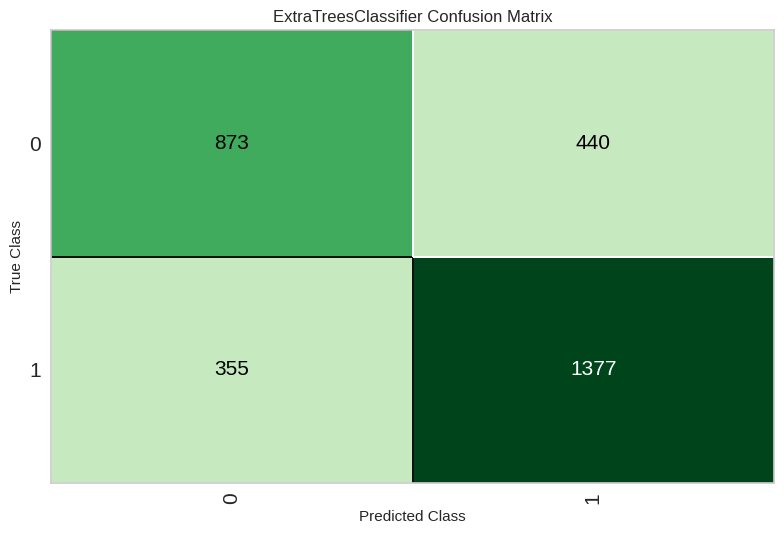

In [88]:
plot_model(tuned_et, plot= 'confusion_matrix')

# Saving the Result

In [89]:
save_model(tuned_et, 'e_coupon_accept_et_model_')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['temperature', 'has_children',
                                              'gender_m', 'expiration_2h',
                                              'toCoupon_GEQ5min',
                                              'toCoupon_GEQ15min',
                                              'toCoupon_GEQ25min',
                                              'direction_same', 'direction_opp',
                                              'No Urgent Place', 'Work',
                                              'Friend(s)', 'Kid(s)', 'Partner',
                                              'Snowy', 'Sunny',
                                              'Carry out & Take away',
                                              'Coff...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                       

In [1]:
# Thank You...